In [1]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
upload = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [44]:
dataset = pd.read_csv('Titanic-Dataset.csv')

In [45]:
dataset = dataset.drop(columns=["PassengerId", "Name","SibSp"], errors='ignore')

In [46]:
dataset.shape

(891, 5)

In [47]:
dataset.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0.0
1,1,female,38.0,71.2833,1.0
2,3,female,26.0,7.9250,1.0
3,1,female,35.0,53.1000,1.0
4,3,male,35.0,8.0500,0.0
5,3,male,NaN,8.4583,0.0
6,1,male,54.0,51.8625,0.0
7,3,male,2.0,21.0750,0.0
8,3,female,27.0,11.1333,1.0
9,2,female,14.0,30.0708,1.0


In [48]:
dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})
dataset['Sex'] = dataset['Sex'].fillna(-1)
dataset['Survived'] = dataset['Survived'].fillna(-1)
print(dataset)

     Pclass  Sex   Age     Fare  Survived
0         3    1  22.0   7.2500       0.0
1         1    0  38.0  71.2833       1.0
2         3    0  26.0   7.9250       1.0
3         1    0  35.0  53.1000       1.0
4         3    1  35.0   8.0500       0.0
..      ...  ...   ...      ...       ...
886       2    1  27.0  13.0000      -1.0
887       1    0  19.0  30.0000      -1.0
888       3    0   NaN  23.4500      -1.0
889       1    1  26.0  30.0000      -1.0
890       3    1  32.0   7.7500      -1.0

[891 rows x 5 columns]


In [49]:
x=dataset.iloc[:,:-1].values
print(x)

[[ 3.      1.     22.      7.25  ]
 [ 1.      0.     38.     71.2833]
 [ 3.      0.     26.      7.925 ]
 ...
 [ 3.      0.         nan 23.45  ]
 [ 1.      1.     26.     30.    ]
 [ 3.      1.     32.      7.75  ]]


In [50]:
y=dataset.iloc[:,-1].values
print(y)

[ 0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.
  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.
  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  1.
  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0

In [51]:
dataset.isna().any()

,0
Pclass,False
Sex,False
Age,True
Fare,False
Survived,False


In [52]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [53]:
dataset['Survived'] = dataset['Survived'].fillna(dataset['Survived'].mean())

In [54]:
dataset.isna().any()

,0
Pclass,False
Sex,False
Age,False
Fare,False
Survived,False


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train,x_test)

[[ 0.81925059 -1.37207547         nan -0.33167904]
 [-0.38096838  0.72882288  0.0859096  -0.42640542]
 [-0.38096838  0.72882288  0.0859096   0.10261958]
 ...
 [ 0.81925059  0.72882288         nan -0.48162887]
 [ 0.81925059 -1.37207547  0.42822906 -0.28868112]
 [-0.38096838  0.72882288  2.0713625   0.14245584]] [[ 0.81925059  0.72882288         nan -0.34739758]
 [ 0.81925059  0.72882288         nan -0.48528755]
 [ 0.81925059  0.72882288 -1.55722384 -0.0546496 ]
 [-1.58118735 -1.37207547         nan  2.28857574]
 [ 0.81925059 -1.37207547 -0.05101819 -0.33167904]
 [-1.58118735  0.72882288         nan -0.02720454]
 [-1.58118735 -1.37207547  0.70208463  2.42713238]
 [-1.58118735 -1.37207547  0.0859096   2.65476071]
 [-1.58118735  0.72882288 -0.32487376  1.18195896]
 [ 0.81925059 -1.37207547         nan -0.49169073]
 [ 0.81925059  0.72882288 -0.25640987 -0.4792157 ]
 [-0.38096838 -1.37207547  0.70208463 -0.37650531]
 [ 0.81925059  0.72882288         nan -0.48129554]
 [-0.38096838 -1.37207547

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
print(np.any(np.isnan(x_train)))

True


In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [60]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [62]:
y_pred = model.predict(x_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.7430167597765364
Confusion Matrix:
[[ 0  7  2]
 [ 0 83 22]
 [ 0 15 50]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.79      0.79      0.79       105
         1.0       0.68      0.77      0.72        65

    accuracy                           0.74       179
   macro avg       0.49      0.52      0.50       179
weighted avg       0.71      0.74      0.72       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
pclass = int(input("Enter Class of Travel:"))
sex = int(input("Enter your gender:"))
age = int(input("Enter your age:"))
fare = float(input("Enter the trip fare:"))
new = [[pclass,sex,age,fare]]
result = model.predict(sc.transform(new))
print(result)
if result == 1:
  print("The passenger will survive")
else:
  print("The passanger may not survive")

Enter Class of Travel:3
Enter your gender:1
Enter your age:2
Enter the trip fare:7.25
[0.]
The passanger may not survive


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       0.79      0.79      0.79       105
         1.0       0.68      0.77      0.72        65

    accuracy                           0.74       179
   macro avg       0.49      0.52      0.50       179
weighted avg       0.71      0.74      0.72       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  7  2]
 [ 0 83 22]
 [ 0 15 50]]


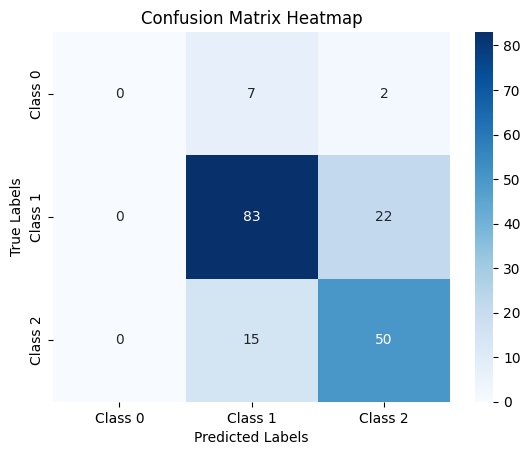

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()